In [1]:
import numpy as np
import random

patterns = []
classes = []

filename = 'Iris_data.txt'
file = open(filename, 'r')

for line in file.readlines():
    row = line.strip().split(',')
    if len(row) == 5:
        patterns.append(row[0:4])
        classes.append(row[4])
    else:
        print(f"Skipping line due to incorrect format: {line}")
print("Iris Data Loaded")
file.close()

patterns = np.asarray(patterns, dtype=np.float32)

sample_no = random.randint(0, len(patterns) - 1)

print("Sample pattern: " + str(patterns[sample_no]))
print("Class of the above pattern: " + str(classes[sample_no]))

Skipping line due to incorrect format: 

Iris Data Loaded
Sample pattern: [6.3 2.8 5.1 1.5]
Class of the above pattern: Iris-virginica


In [2]:
def mapunits(input_len,size='small'):
    
    heuristic_map_units = 5*input_len**0.54321
     
    if size == 'big':
        heuristic_map_units = 4*(heuristic_map_units)
    else:
        heuristic_map_units = 0.25*(heuristic_map_units)
        
    return heuristic_map_units
        
        
map_units = mapunits(len(patterns),size='big')
print("Heuristically computed appropriate no. of map units: "+str(int(map_units)))

Heuristically computed appropriate no. of map units: 304


Lower error found: 0.9337738030476717 at epoch: 0
	Learning rate: 0.1
	Neighbourhood radius: 4.5
Lower error found: 0.8357704460757814 at epoch: 1
	Learning rate: 0.0998
	Neighbourhood radius: 4.491008994002999
Lower error found: 0.4805667021652575 at epoch: 4
	Learning rate: 0.09920000000000001
	Neighbourhood radius: 4.464143616766773
Lower error found: 0.2985266762214532 at epoch: 21
	Learning rate: 0.0958
	Neighbourhood radius: 4.31491401257618
Lower error found: 0.27607539062128966 at epoch: 55
	Learning rate: 0.08900000000000001
	Neighbourhood radius: 4.031253608834377
Lower error found: 0.26731389938826694 at epoch: 71
	Learning rate: 0.0858
	Neighbourhood radius: 3.904295654186613
Lower error found: 0.22593911691368157 at epoch: 72
	Learning rate: 0.08560000000000001
	Neighbourhood radius: 3.8964948662664223
Lower error found: 0.2195295732485589 at epoch: 154
	Learning rate: 0.0692
	Neighbourhood radius: 3.3071189310408093
Lower error found: 0.1340364338703697 at epoch: 185
	Lea

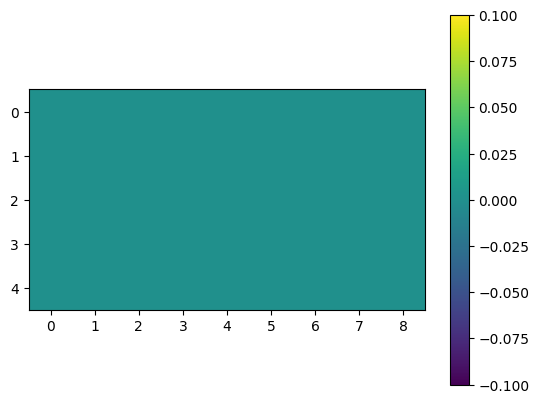

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def Eucli_dists(MAP, x):
    x = x.reshape((1, 1, -1))
    Eucli_MAP = MAP - x
    Eucli_MAP = Eucli_MAP**2
    Eucli_MAP = np.sqrt(np.sum(Eucli_MAP, 2))
    return Eucli_MAP

input_dimensions = 4

map_width = 9
map_height = 5
MAP = np.random.uniform(size=(map_height, map_width, input_dimensions))
prev_MAP = np.zeros((map_height, map_width, input_dimensions))

radius0 = max(map_width, map_height) / 2
learning_rate0 = 0.1

coordinate_map = np.zeros([map_height, map_width, 2], dtype=np.int32)

for i in range(0, map_height):
    for j in range(0, map_width):
        coordinate_map[i][j] = [i, j]

epochs = 500
radius = radius0
learning_rate = learning_rate0
max_iterations = len(patterns) + 1
too_many_iterations = 10 * max_iterations

convergence = [1]

timestep = 1
e = 0.001
flag = 0

def repulsion_force(neuron, neighbors, min_dist=0.5, force=0.1):
    for neighbor in neighbors:
        distance = np.linalg.norm(neuron - neighbor)
        if distance < min_dist:
            direction = (neuron - neighbor) / distance
            neuron += force * direction
    return neuron

epoch = 0
while epoch < epochs:
    shuffle = np.random.randint(len(patterns), size=len(patterns))
    for i in range(len(patterns)):
        J = np.linalg.norm(MAP - prev_MAP)

        if J <= e:
            flag = 1
            break
        else:
            pattern = patterns[shuffle[i]]
            pattern_ary = np.tile(pattern, (map_height, map_width, 1))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)

            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)

            prev_MAP = np.copy(MAP)

            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= radius:
                        MAP[i][j] = MAP[i][j] + learning_rate * (pattern - MAP[i][j])

                        neighbors = []
                        for di in range(-1, 2):
                            for dj in range(-1, 2):
                                ni, nj = i + di, j + dj
                                if 0 <= ni < map_height and 0 <= nj < map_width and (di != 0 or dj != 0):
                                    neighbors.append(MAP[ni][nj])

                        MAP[i][j] = repulsion_force(MAP[i][j], neighbors)

            learning_rate = learning_rate0 * (1 - (epoch / epochs))
            radius = radius0 * math.exp(-epoch / epochs)

            timestep += 1

    if J < min(convergence):
        print('Lower error found: %s' % str(J) + ' at epoch: %s' % str(epoch))
        print('\tLearning rate: ' + str(learning_rate))
        print('\tNeighbourhood radius: ' + str(radius))
        MAP_final = MAP
    convergence.append(J)

    if flag == 1:
        break
    epoch += 1

# Plot the final MAP
plt.imshow(np.argmax(MAP_final, axis=2), interpolation='nearest')
plt.colorbar()
plt.show()


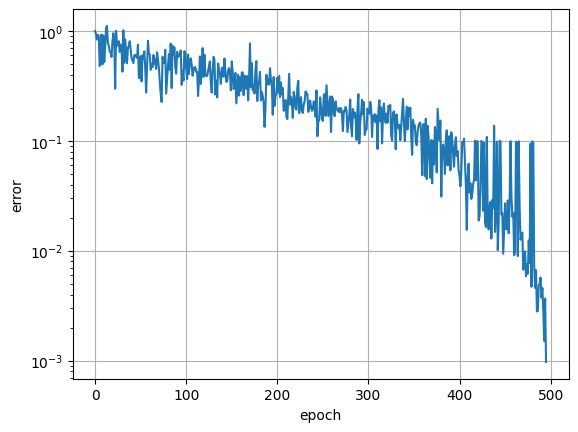

Number of timesteps: 74154
Final error: 0.0009737922930214788


In [11]:
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Number of timesteps: ' + str(timestep))
print('Final error: ' + str(J))

Red = Iris-Setosa
Green = Iris-Virginica
Blue = Iris-Versicolor


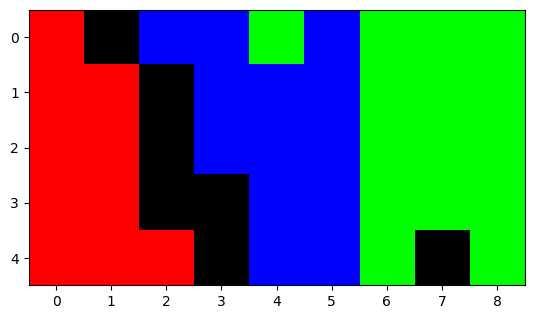

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Assuming patterns and classes are defined somewhere above this code

# Initialize the result_map to store the color values
result_map = np.zeros([map_height, map_width, 3], dtype=np.float32)

# Define the color map for the classes
color_map = {
    'Iris-setosa': [1.0, 0, 0],      # Red
    'Iris-virginica': [0, 1.0, 0],   # Green
    'Iris-versicolor': [0, 0, 1.0]   # Blue
}

# Iterate through each pattern and assign colors based on BMU
for i, pattern in enumerate(patterns):
    pattern_ary = np.tile(pattern, (map_height, map_width, 1))
    Eucli_MAP = np.linalg.norm(pattern_ary - MAP_final, axis=2)

    BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
    
    x, y = BMU

    class_color = color_map[classes[i]]

    result_map[x, y] = class_color

# Flip the result_map for correct orientation
result_map = np.flip(result_map, 0)

# Print class-color associations
print("Red = Iris-Setosa")
print("Green = Iris-Virginica")
print("Blue = Iris-Versicolor")

# Display the result_map using matplotlib
plt.imshow(result_map, interpolation='nearest')
plt.show()
